#### RFM analysis is a marketing technique that helps businesses segment customers based on their recency, frequency, and monetary value. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
df=pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [31]:
df.shape

(541116, 12)

## To do RFM Analysis we don't need all of this data
    Recency: It can be achieved by Date of purchase feature.
    Frequency: It can be achieved by InvoieNo feature. It can tell how many time a customer has purchased.
    Moonetory:  It can be achieved by Price feature.
    CustomerID: It is also used to identify the customer.
## So I can drop rest of the columns

In [32]:
df.drop(columns=['Item Code','Quantity','Time','price per Unit','Shipping Location','Cancelled_status',
                    'Reason of return','Sold as set'],inplace=True,axis=1)

In [16]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


# Check for duplicate values

In [33]:
df.duplicated().sum()

np.int64(6008)

In [34]:
df.drop_duplicates(inplace=True,ignore_index=False)

In [35]:
df.duplicated().sum()

np.int64(0)

# Check for null Values

In [36]:
df.isna().sum()/len(df)*100

CustomerID          24.714450
InvoieNo             0.000187
Date of purchase     0.000187
Price                0.000187
dtype: float64

#### Drop the missing value in customerID as you can't drop it, u cannot fill customerid, invoiceno with main

In [37]:
df.dropna(inplace=True)

In [38]:
df.isna().sum()/len(df)*100

CustomerID          0.0
InvoieNo            0.0
Date of purchase    0.0
Price               0.0
dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


#### Changing the format of features

In [43]:
df['CustomerID']=df['CustomerID'].astype('int')
df['InvoieNo']=df['InvoieNo'].astype('int')
df['Date of purchase']=pd.to_datetime(df['Date of purchase'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        402859 non-null  int64         
 1   InvoieNo          402859 non-null  int64         
 2   Date of purchase  402859 non-null  datetime64[ns]
 3   Price             402859 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.4 MB


In [45]:
df

,CustomerID,InvoieNo,Date of purchase,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0
...,...,...,...,...
537945,37,402292,2017-11-28,384.0
537946,37,402292,2017-11-27,398.0
537947,21,363890,2016-12-21,2464.0
537948,21,363890,2016-12-21,4068.0


In [46]:
df.describe()

,CustomerID,InvoieNo,Date of purchase,Price
count,402859.000000,402859.000000,402859,402859.000000
mean,2182.187224,385642.971491,2017-07-15 14:25:02.538605056,2477.465103
min,2.000000,361429.000000,2016-12-02 00:00:00,-10152.000000
25%,1207.000000,374193.000000,2017-04-12 00:00:00,556.000000
50%,2078.000000,386934.000000,2017-08-05 00:00:00,1572.000000
75%,3291.000000,397130.000000,2017-10-26 00:00:00,2496.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,90400.000000
std,1252.636483,13106.663884,NaN,4896.268647


In [48]:
df['Date of purchase'].max()

Timestamp('2017-12-19 00:00:00')

##### Here the recency will be calculated after the last date which is 2017-12-19, on this date the data is closed

In [50]:
import datetime as dt
latest_date=dt.datetime(2017,12,20)  #2017-12-(19+1)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

# RFM

In [99]:
RFM_Score=df.groupby('CustomerID').agg({'Date of purchase': lambda x: (latest_date-x.max()).days,   # Recency
                             'InvoieNo': lambda x: x.count(),                                       # Frequency
                             'Price': lambda x: x.sum()})                                           # Monetory
RFM_Score

,Date of purchase,InvoieNo,Price
CustomerID,,,
2,4,181,550416.0
3,77,27,257404.0
4,19,72,176613.0
5,311,16,41976.0
6,37,84,151822.0
...,...,...,...
4368,278,10,20480.0
4369,181,7,10774.0
4370,9,13,24962.0


#### Code Explanation:
    df.groupby('CustomerID').agg() ---> Here we are grouping the customer based on their customer id and perform operation on each customer(agg ftn)
    
    {'Date of purchase': lambda x: (latest_date-x.max()).days ---> This is used to calculate recency 'x' we r taking maximum date of that single cutomer and subtracting it with the latest date which will give the number of days that customer has last purchase i.e latest_date-x.max()
    
    'InvoieNo': lambda x: x.count() ---> Used to count how many times a customer has purchased anything i.e count
    
    'Price': lambda x: x.sum() ---> Used to calculate the total sum of amount that single customer had spent i.e sum

##### Renaming the ccolumns in RFM_Score

In [100]:
RFM_Score.rename(columns={'Date of purchase': 'Recency',
                 'InvoieNo': 'Frequency',
                 'Price': 'Monetary',
                 }, inplace=True)
RFM_Score

,Recency,Frequency,Monetary
CustomerID,,,
2,4,181,550416.0
3,77,27,257404.0
4,19,72,176613.0
5,311,16,41976.0
6,37,84,151822.0
...,...,...,...
4368,278,10,20480.0
4369,181,7,10774.0
4370,9,13,24962.0


In [101]:
RFM_Score.describe().round(2)

,Recency,Frequency,Monetary
count,4349.0,4349.00,4349.00
mean,93.3,92.63,229493.93
std,100.7,230.74,855668.52
min,1.0,1.00,-50372.00
25%,18.0,17.00,38140.00
50%,51.0,42.00,83635.00
75%,144.0,101.00,205444.00
max,381.0,7919.00,35472089.00


In [102]:
# Creating a quantile: It will give about customers behaviour
quantile=RFM_Score.quantile(q=[0.25,0.50,0.75])
quantile

,Recency,Frequency,Monetary
0.25,18.0,17.0,38140.0
0.50,51.0,42.0,83635.0
0.75,144.0,101.0,205444.0


In [103]:
quantile=quantile.to_dict()        #converting it to dictionary
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

# Function for Scores

In [104]:
def recency_score(x, q, d):
    if x<=d[q][0.25]:             # Lower the recency give him the higher rank '1'  d[q][0.25] = quantile of 0.25
        return 1
    elif x<=d[q][0.50]:
        return 2
    elif x<=d[q][0.75]:
        return 3
    else:
        return 4
def FnM_score(x, q, d):
    if x<=d[q][0.25]:             # Lower the Frequency and Monetary give him the lowest rank '4'
        return 4
    elif x<=d[q][0.5]:
        return 3
    elif x<=d[q][0.75]:
        return 2
    else:
        return 1

In [105]:
quantile['Recency'][0.25]  # d[q][0.25] Like this

18.0

In [106]:
RFM_Score['Recency_Score']=RFM_Score['Recency'].apply(recency_score,args=('Recency',quantile))  # Arguments passed to function x= RFM_Score['Recency']
RFM_Score['Frequency_Score']=RFM_Score['Frequency'].apply(FnM_score,args=('Frequency',quantile))
RFM_Score['Monetary_Score']=RFM_Score['Monetary'].apply(FnM_score,args=('Monetary',quantile))
RFM_Score

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
2,4,181,550416.0,1,1,1
3,77,27,257404.0,3,3,1
4,19,72,176613.0,2,2,2
5,311,16,41976.0,4,4,3
6,37,84,151822.0,2,2,2
...,...,...,...,...,...,...
4368,278,10,20480.0,4,4,4
4369,181,7,10774.0,4,4,4
4370,9,13,24962.0,1,4,4


In [109]:
# Creating a loyality Score based on these score
RFM_Score['Loyality_Score']=RFM_Score['Recency_Score']+RFM_Score['Frequency_Score']+RFM_Score['Monetary_Score']
RFM_Score

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Loyality_Score
CustomerID,,,,,,,
2,4,181,550416.0,1,1,1,3
3,77,27,257404.0,3,3,1,7
4,19,72,176613.0,2,2,2,6
5,311,16,41976.0,4,4,3,11
6,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...
4368,278,10,20480.0,4,4,4,12
4369,181,7,10774.0,4,4,4,12
4370,9,13,24962.0,1,4,4,9


# Creating a Loyality Badge based loyality score

In [110]:
badges=['Platinum','Gold','Silver','Bronze']
RFM_Score['Badges']=pd.qcut(RFM_Score['Loyality_Score'], 4, labels=badges)   # Divide the RFM_Score['Loyality_Score'] in 4 equal parts
RFM_Score

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Loyality_Score,Badges
CustomerID,,,,,,,,
2,4,181,550416.0,1,1,1,3,Platinum
3,77,27,257404.0,3,3,1,7,Gold
4,19,72,176613.0,2,2,2,6,Gold
5,311,16,41976.0,4,4,3,11,Bronze
6,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...
4368,278,10,20480.0,4,4,4,12,Bronze
4369,181,7,10774.0,4,4,4,12,Bronze
4370,9,13,24962.0,1,4,4,9,Silver


### Now delete these features- Recency_Score Frequency_Score Monetary_Score Loyality_Score

In [114]:
new_data=RFM_Score.reset_index()             # Will give indeces to RFM_Score
new_data

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Loyality_Score,Badges
0,2,4,181,550416.0,1,1,1,3,Platinum
1,3,77,27,257404.0,3,3,1,7,Gold
2,4,19,72,176613.0,2,2,2,6,Gold
3,5,311,16,41976.0,4,4,3,11,Bronze
4,6,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368,278,10,20480.0,4,4,4,12,Bronze
4345,4369,181,7,10774.0,4,4,4,12,Bronze
4346,4370,9,13,24962.0,1,4,4,9,Silver
4347,4371,4,751,279720.0,1,1,1,3,Platinum


In [115]:
new_data=new_data[['CustomerID','Recency','Frequency','Monetary','Badges']]
new_data

,CustomerID,Recency,Frequency,Monetary,Badges
0,2,4,181,550416.0,Platinum
1,3,77,27,257404.0,Gold
2,4,19,72,176613.0,Gold
3,5,311,16,41976.0,Bronze
4,6,37,84,151822.0,Gold
...,...,...,...,...,...
4344,4368,278,10,20480.0,Bronze
4345,4369,181,7,10774.0,Bronze
4346,4370,9,13,24962.0,Silver
4347,4371,4,751,279720.0,Platinum


## Now you can do visualization with this data

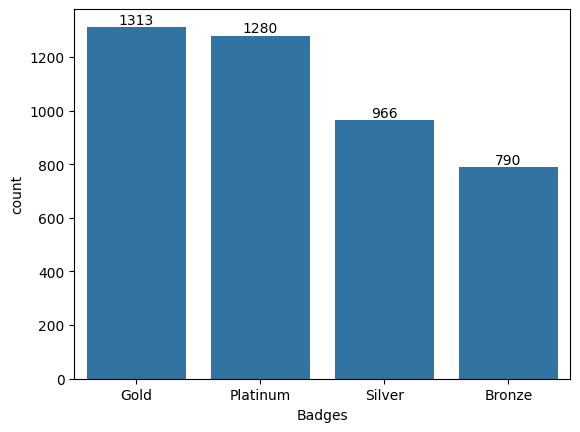

In [133]:
ax=sns.countplot(x=new_data['Badges'],order=new_data['Badges'].value_counts().index) # order=new_data['Badges'].value_counts().index--->To arrange graph
ax.bar_label(ax.containers[0]) # Will give u the count
plt.show()                                                                         


In [ ]:
# You can export the data
# pd.to_csv()